In [1]:
pip install refractio[snowflake]

     |████████████████████████████████| 12.3MB 14.5MB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 45.1MB/s eta 0:00:01
     |████████████████████████████████| 512kB 41.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 46.4MB/s eta 0:00:01
     |████████████████████████████████| 18.2MB 42.0MB/s eta 0:00:01
     |████████████████████████████████| 348kB 49.3MB/s eta 0:00:01
     |████████████████████████████████| 143kB 48.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 49.8MB/s eta 0:00:01
     |████████████████████████████████| 71kB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 50.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 450kB 48.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 54.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 11.5MB/s eta 0:00:

Note: you may need to restart the kernel to use updated packages.


In [8]:
from refractio import snowflake
import matplotlib.pyplot as plt
import pandas as pd
# To read a specific dataset published from a snowflake connection with only top few records.

dataset = snowflake.get_dataframe("PHARMADATA")
dataset.columns

Index(['PHYSICIAN_ID', 'IMS_ID', 'NPI_ID', 'ADDRESS', 'STATE', 'CITY',
       'ZIP_CODE', 'PHYSICIAN_NAME', 'SPECIALTY', 'SPECIALTY_GROUP', 'DATE',
       'BRAND', 'THERAPY_AREA', 'MARKET', 'PAYER_CHANNEL', 'PAYER', 'TRX',
       'NRX', 'NBRX', 'NTS', 'SWITCH', 'REGION', 'DISTRICT', 'TERRITORY',
       'SALES_FORCE', 'CALL_DETAILS', 'VEEVA_APPROVED_EMAIL', 'REMOTE_CALLS',
       'TARGET_TYPE', 'REFILLS', 'NBRX_DERIVED', 'TRX_DERIVED'],
      dtype='object')

<ipython-input-10-ec46157b126d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphatumab_data['DATE'] = pd.to_datetime(alphatumab_data['DATE'])


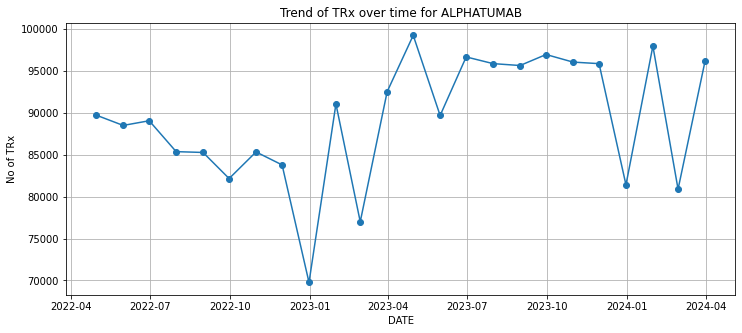

In [10]:
alphatumab_data = dataset[dataset['BRAND']=='ALPHATUMAB']
alphatumab_data['DATE'] = pd.to_datetime(alphatumab_data['DATE'])
monthly_data = alphatumab_data.resample('M', on='DATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['TRX_DERIVED'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for ALPHATUMAB')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()